# Airfoil_Self_Noise Data Set

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

Lets get started!

## Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('airfoil_self_noise.dat', sep='\t', names=['freq', 'angle', 'chord','velocity','displacement','pressure'])

In [5]:
df.head()

,freq,angle,chord,velocity,displacement,pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## Data Check
Check if any kind of data processing required

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
freq            1503 non-null int64
angle           1503 non-null float64
chord           1503 non-null float64
velocity        1503 non-null float64
displacement    1503 non-null float64
pressure        1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [7]:
df.describe()

,freq,angle,chord,velocity,displacement,pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [9]:
df.isnull().T.any().T.any()

False

In [11]:
df.isnull().sum()

freq            0
angle           0
chord           0
velocity        0
displacement    0
pressure        0
dtype: int64

## Exploratory Data Analysis

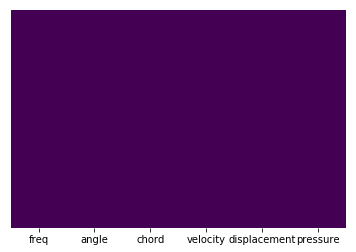

In [12]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

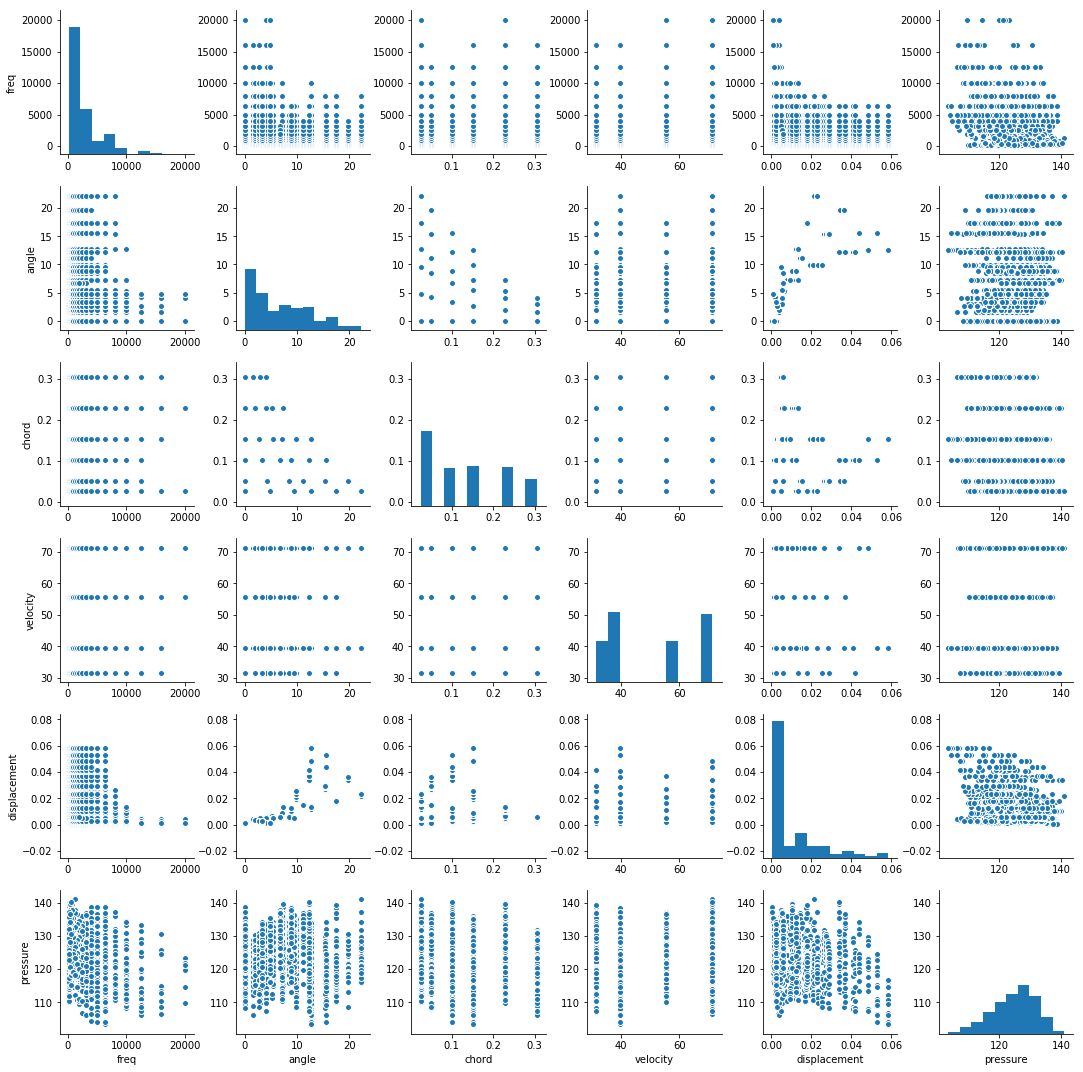

In [13]:
sns.pairplot(df)

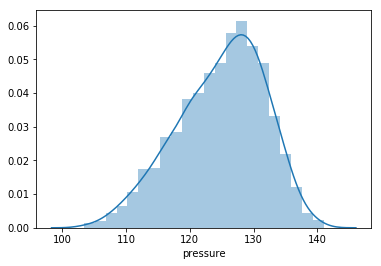

In [14]:
sns.distplot(df.pressure)

### Here No Linear Relationship is to be found. Hence Linear Regression may not be the right model for this dataset. However, just for the sake of practicing, we will go forward and apply linear regression on this model.

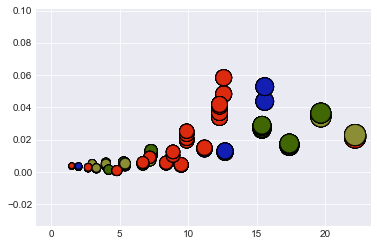

In [28]:
plt.style.use('seaborn-darkgrid')
plt.scatter(df['angle'], df['displacement'], alpha=0.7,marker='o', s=df.angle*20, c=['r','g','b','y'], edgecolors='black')

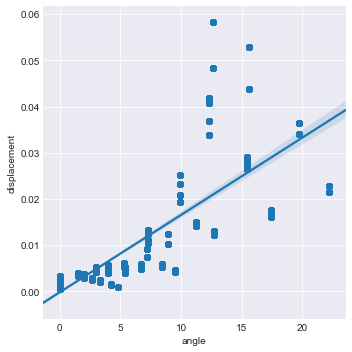

In [42]:
sns.lmplot(x='angle', y='displacement', data=df)

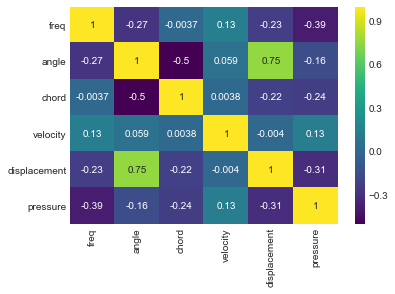

In [43]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('pressure',axis=1), df['pressure'], test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predicting the Variables

In [34]:
pred = lm.predict(X_test)

## Evaluating the Model
** Now evaluating the model with r2 score and coefficients and errors **

** R2 Score **

In [35]:
from sklearn import metrics

In [37]:
print(metrics.r2_score(y_test, pred))

0.545250154543


** Coefficients **

In [38]:
coefficients = pd.DataFrame(lm.coef_, index=df.columns[:-1], columns=['Coefficients'])

In [39]:
coefficients

,Coefficients
freq,-0.001208
angle,-0.421277
chord,-35.949614
velocity,0.093341
displacement,-147.089444


**Interpreting the coefficients: **
- Holding all other features fixed, 1 unit increase in frequency is associated with **decrease of 0.001208 unit pressure**.
- Holding all other features fixed, 1 unit increase in angle is associate with **decrease of 0.421277 unit pressure**
- Holding all other features fixed, 1 unit increase in chord is associated with **decrese of 35.949614 unit pressure**
- Holding all other features fixed, 1 unit increase in velocity is associated with **increase of 0.093341 unit pressure**
- Holding all other features fixed, 1 unit increase in displace is associated with **decrease of 147.089 unit pressure**

** Calculating Errors **

In [40]:
print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print("MSE: ", metrics.mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE:  3.51034617723
MSE:  21.2130571577
RMSE:  4.60576347175


** Plotting the Test Values Vs Predicted Values **

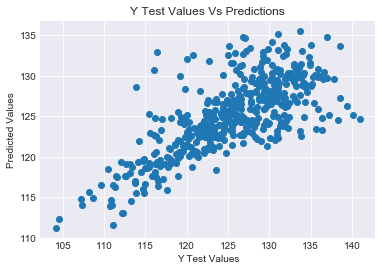

In [44]:
plt.title('Y Test Values Vs Predictions')
plt.xlabel('Y Test Values')
plt.ylabel('Predicted Values')
plt.scatter(y_test, pred)

## Residuals

You should have gotten a model with an OK OK fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

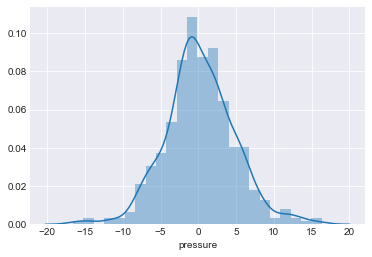

In [46]:
sns.distplot((y_test-pred))

** The residuals looks normally distributed **